# [How to apply LSTM using PyTorch](https://cnvrg.io/pytorch-lstm/) - Practical Implementation in PyTorch


In [ ]:
import sys
import os
from os import path
import importlib

import numpy as np
np.set_printoptions(formatter={'float_kind':"{:-.3e}".format})
np.random.seed(0)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 4)

import torch
torch.manual_seed(0)

import torch.nn as nn
from torch.autograd import Variable

SRC_DIR = path.join(os.path.abspath(""), '../')
sys.path.append(SRC_DIR)

from core import _
import hist_data as hd

In [340]:
hd.set_hist_data(data_count=None)

In [476]:
import nn_tools.lstm as ls
importlib.reload(ls)
import nn_tools.data_source as ns
importlib.reload(ns)
import nn_tools.data_sequencer as ds
importlib.reload(ds)

<module 'nn_tools.data_sequencer' from 'c:\\users\\stefa\\documents\\workspaces\\szx81\\szx81\\nn_tools\\data_sequencer.py'>

## NN Driver test begin

In [499]:
dr = ls.NnDriver(
        data_source_class=ns.ForexDataSource,
        model_class=ls.Model,
        future_len=5,
        num_layers=3,
        verbose=True
        )

In [403]:
print('NnDriver model:', dr.model)

NnDriver model: Model(
  (model): LSTM(10, 100, num_layers=3, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)


In [500]:
dr.train(end_day=2, data_count=2000)

begin index: 2880, end index: 4895, count:2000
Epoch [10/1000], Loss: 9.5e-01,  Diff: 1.1e-02
Epoch [20/1000], Loss: 6.9e-01,  Diff: 6.0e-02
Epoch [30/1000], Loss: 1.0e-01,  Diff: 3.1e-01
Epoch [40/1000], Loss: 7.8e-02,  Diff: 6.4e-02
Epoch [50/1000], Loss: 3.5e-02,  Diff: 2.6e-02
Epoch [60/1000], Loss: 2.9e-02,  Diff: 3.0e-02
Epoch [70/1000], Loss: 2.4e-02,  Diff: 9.8e-03
Epoch [80/1000], Loss: 2.3e-02,  Diff: 7.9e-03
Epoch [90/1000], Loss: 2.2e-02,  Diff: 2.7e-03
Epoch [100/1000], Loss: 2.1e-02,  Diff: 2.4e-03
Epoch [110/1000], Loss: 2.0e-02,  Diff: 2.8e-03
Epoch [120/1000], Loss: 2.0e-02,  Diff: 2.6e-03
Epoch [130/1000], Loss: 1.9e-02,  Diff: 2.3e-03
Epoch [140/1000], Loss: 1.9e-02,  Diff: 2.2e-03
Epoch [150/1000], Loss: 1.9e-02,  Diff: 2.1e-03
Epoch [160/1000], Loss: 1.8e-02,  Diff: 2.0e-03
Epoch [170/1000], Loss: 1.8e-02,  Diff: 1.8e-03
Epoch [180/1000], Loss: 1.8e-02,  Diff: 1.7e-03
Epoch [190/1000], Loss: 1.7e-02,  Diff: 1.6e-03
Epoch [200/1000], Loss: 1.7e-02,  Diff: 1.4e-03
Ep

In [520]:
shift = 10

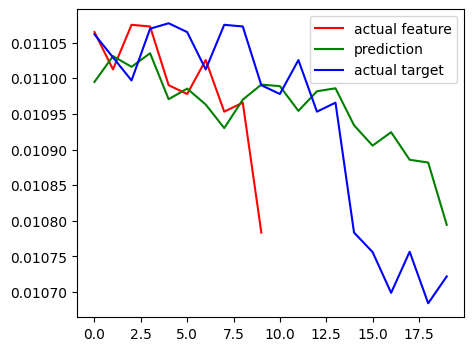

In [537]:
dr.show_action(shift=shift, count=20)
shift += 50

## Forex Training&Testing data

end=2880 data len=25, seq_len=10, count=10 future_len=5
x:
[[2854 2855 2856 2857 2858 2859 2860 2861 2862 2863]
 [2855 2856 2857 2858 2859 2860 2861 2862 2863 2864]
 [2856 2857 2858 2859 2860 2861 2862 2863 2864 2865]
 [2857 2858 2859 2860 2861 2862 2863 2864 2865 2866]
 [2858 2859 2860 2861 2862 2863 2864 2865 2866 2867]
 [2859 2860 2861 2862 2863 2864 2865 2866 2867 2868]
 [2860 2861 2862 2863 2864 2865 2866 2867 2868 2869]
 [2861 2862 2863 2864 2865 2866 2867 2868 2869 2870]
 [2862 2863 2864 2865 2866 2867 2868 2869 2870 2871]
 [2863 2864 2865 2866 2867 2868 2869 2870 2871 2872]]
y:
[2868 2869 2870 2871 2872 2873 2874 2875 2876 2877]


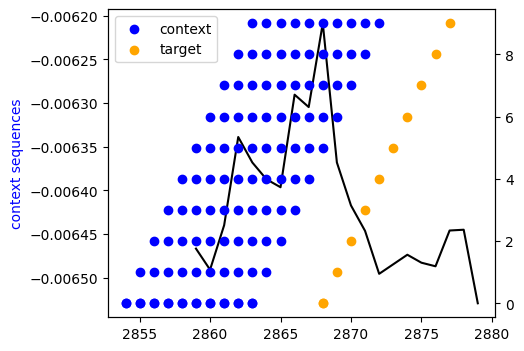

In [460]:
NUM_LAYERS = 3
end_day = 2
context_len = 10
future_len = 5

# [-6.368e-03 -6.387e-03 -6.396e-03 -6.290e-03 -6.305e-03 -6.209e-03
cs = ds.ContextSequencer(
    ds.ForexDataSource, end_day=end_day, seq_len=context_len, 
    future_len=future_len)
cs.plot()